In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
from collections import Counter
from wordcloud import WordCloud

In [152]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [153]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [154]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [155]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [156]:
print("Shape of movies dataset:",movies.shape)
print("Shape of credits dataset:",credits.shape)

Shape of movies dataset: (4803, 20)
Shape of credits dataset: (4803, 4)


In [157]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [158]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


## Q1: Combine the two datsets as one dataframe

In [159]:
# Combining the two DataFrames
df=pd.merge(movies,credits)
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Q2: Remove the following columns:
- 'homepage','tagline','id','overview','status','original_title','movie_id'.

In [160]:
# Removing the specified columns
movies_cleaned_df = df.drop(columns=['homepage', 'tagline', 'id', 'overview', 'status', 'original_title', 'movie_id'])
movies_cleaned_df.head(3)



,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [161]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


## Q3: Create Genres dataframe that hase two coulumns Genres and Frequency
- Hint: Use Counter to calculate Frequency
- Add new catagory to Genres called Others when the Frequency < 200

In [162]:
a=pd.DataFrame(columns=['Genres'])
from ast import literal_eval
a['Genres']=movies_cleaned_df['genres'].apply(literal_eval)

print(a['Genres'][0])
print(a['Genres'][0][0])
print(a['Genres'][0][0].get("id"))

[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]
{'id': 28, 'name': 'Action'}
28


In [163]:
b=pd.DataFrame(columns=['name'])
for i in a['Genres']:
  for j in i:
    b.loc[len(b)]=[j.get('name')]

In [164]:
b

,name
0,Action
1,Adventure
2,Fantasy
3,Science Fiction
4,Adventure
...,...
12172,Comedy
12173,Drama
12174,Romance
12175,TV Movie


In [165]:
Genres=pd.DataFrame(columns=['Genres' ,'Frequency'])

Genres['Genres']=b['name'].value_counts().index
Genres['Frequency']=b['name'].value_counts().values

for i in range (len(Genres)):
  if Genres['Frequency'][i]<200:
     Genres['Genres'][i]='others'
Genres

<ipython-input-165-69b322aac31b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Genres['Genres'][i]='others'


,Genres,Frequency
0,Drama,2300
1,Comedy,1723
2,Thriller,1275
3,Action,1156
4,Romance,895
5,Adventure,792
6,Crime,697
7,Science Fiction,538
8,Horror,520
9,Family,514


## Q4: Use bar chart draws the relationship between genres of movies and Frequency.
![p1.png](attachment:p1.png)

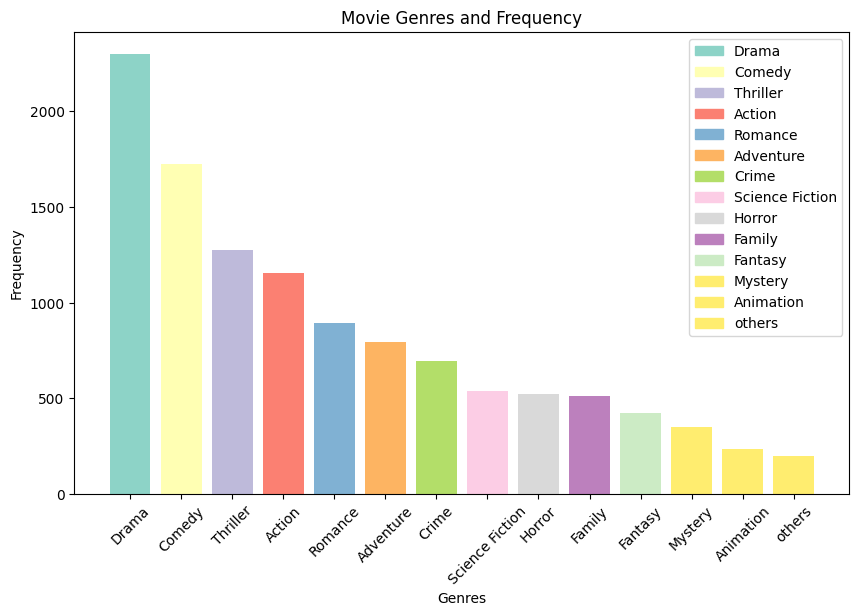

In [166]:
# Generate a color palette for the bars
color_palette = plt.cm.Set3(np.arange(len(Genres)))

# Ploting the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(Genres['Genres'], Genres['Frequency'], color=color_palette)

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Movie Genres and Frequency')

plt.xticks(rotation=45)

# Creating a legend for the color-coded genres
legend_labels = Genres['Genres'].unique()
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_palette[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, loc='upper right')

# Show the plot
plt.show()

## Q5: Use pie chart to draw top 5 languages.
- Hint: use counter to create dataframe contains production_countries with Frequencies.
![p2.png](attachment:p2.png)

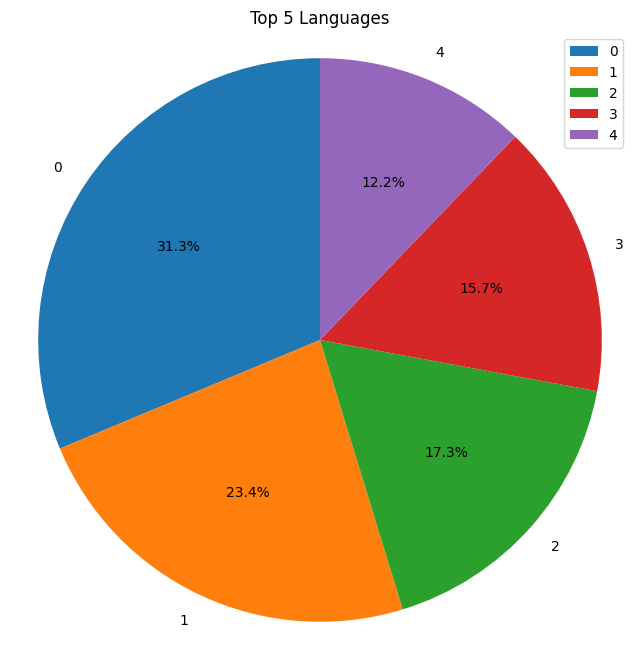

In [167]:

# Select the top 5 languages
top_5_languages = Genres.head(5)

# Extract the language names and frequencies
languages = top_5_languages.index
frequencies = top_5_languages['Frequency']

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(frequencies, labels=languages, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal for a circular pie chart
plt.axis('equal')

# Create a legend
plt.legend(patches, languages, loc='upper right')

# Set title
plt.title('Top 5 Languages')

# Show the pie chart
plt.show()

## Q6: Use WordCloud to draw genres.

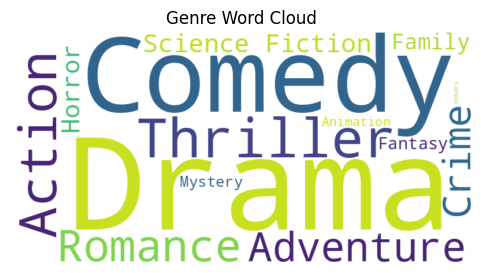

In [168]:
# Converting the 'Genres' DataFrame to a dictionary
genres_dict = Genres.set_index('Genres')['Frequency'].to_dict()

# Creatign a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generating the word cloud from the genre frequencies
wordcloud.generate_from_frequencies(genres_dict)

# Plot the word cloud
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')

# Show the plot
plt.show()

## Q7: Use scatter plot to draw the relationship between budget and revenue.
![p3.png](attachment:p3.png)

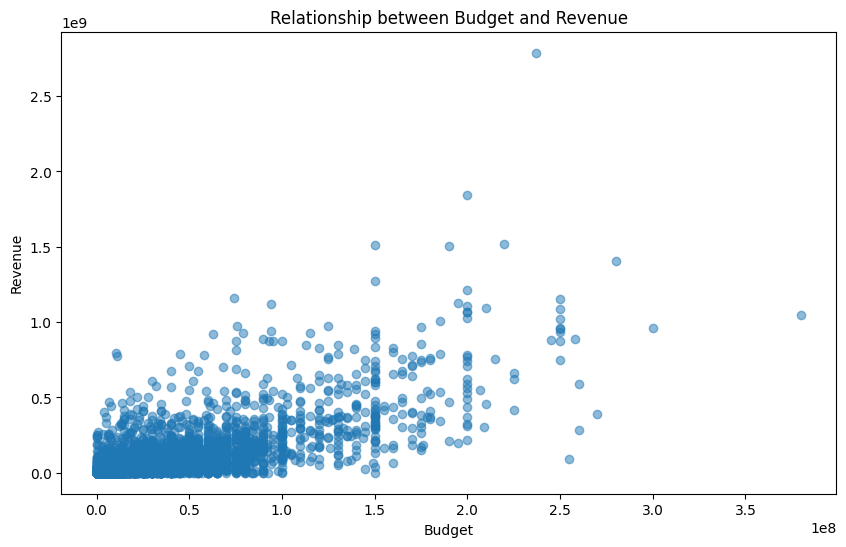

In [169]:
budget =movies_cleaned_df['budget']
revenue =movies_cleaned_df['revenue']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(budget, revenue, alpha=0.5)

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relationship between Budget and Revenue')

# Show the plot
plt.show()

## Q8: Use line chart to draw the relationship between revenue and popularity.
![p4.png](attachment:p4.png)

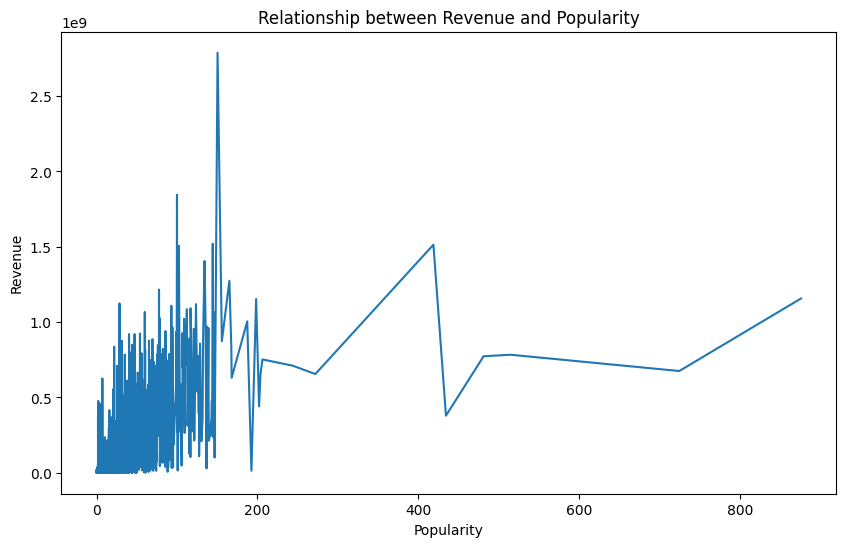

In [175]:
revenue = movies_cleaned_df['revenue']
popularity = movies_cleaned_df['popularity']

# Sort the data by popularity in ascending order
sorted_data = movies_cleaned_df.sort_values(by='popularity')

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['popularity'], sorted_data['revenue'])

# Set labels and title
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Relationship between Revenue and Popularity')

# Show the plot
plt.show()